# Importing Library & Dataset

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/DnYAlv/ML-Mini-Project/main/Titanic/titanic.csv')
df.drop(['Name', 'Sex', 'Ticket', 'Fare', 'Embarked', 'Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
0,1,0,3,22.0,1,0
1,2,1,1,38.0,1,0
2,3,1,3,26.0,0,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
dtype: int64

- Terdapat 177 age value yang bernilai NA

# Data Cleaning

In [8]:
df['Age'].fillna((df['Age'].mean()), inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
dtype: int64

# Visual Exploratory Data Analysis

## Visualize between variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


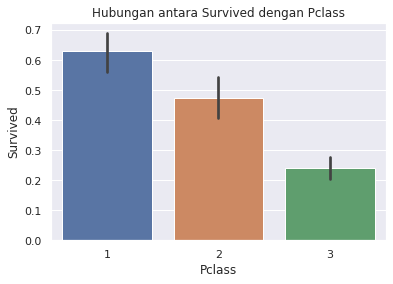

In [16]:
sns.barplot(df['Pclass'], df['Survived'])
plt.ylabel('Survived')
plt.xlabel('Pclass')
plt.title('Hubungan antara Survived dengan Pclass')
plt.show()

- Dari hasil visualisasi di atas, dapat dilihat bahwa Passenger ID yang dominan survived adalah 1, dan sebaliknya adalah Passenger ID 3



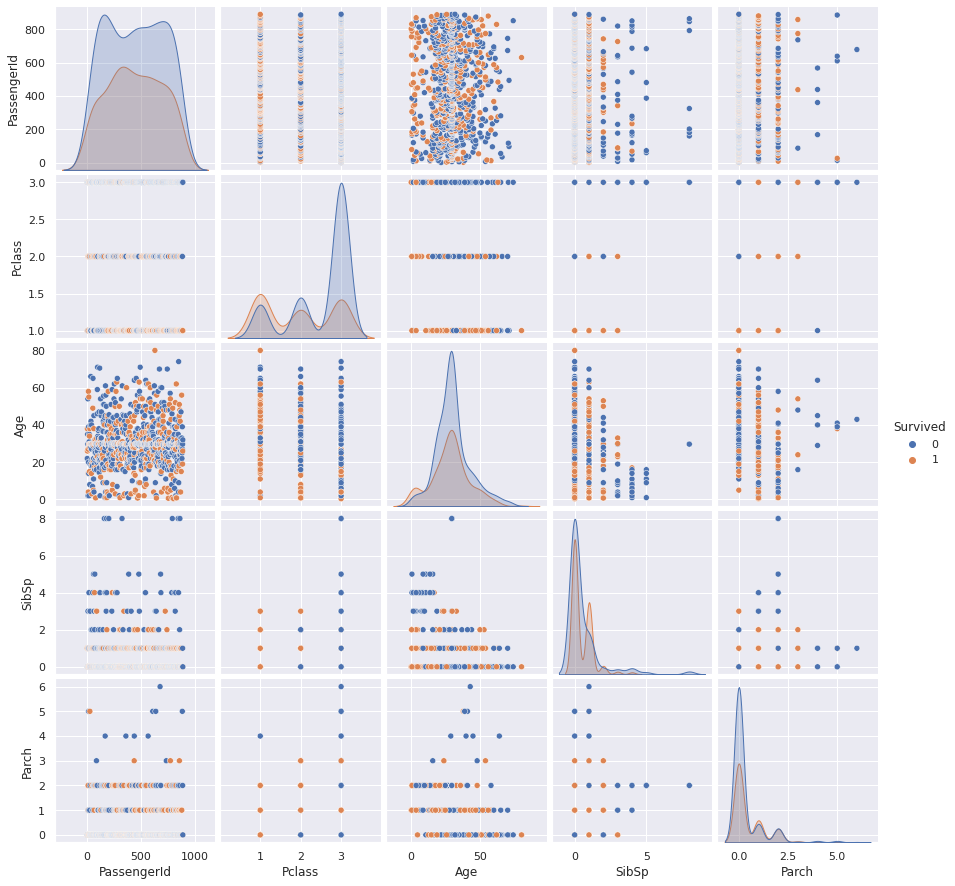

In [12]:
sns.pairplot(df, hue='Survived')

## Correlation

In [17]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000


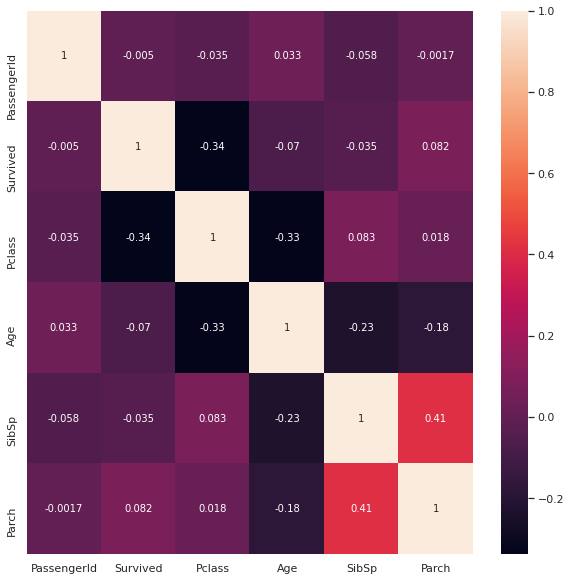

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Dari heatmap di atas, dapat dilihat bahwa korelasi yang paling kuat antara independent variable dan dependent variable adalah Pclass (-0.34)

# Training and Test set

In [21]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch
331,332,1,45.5,0,0
733,734,2,23.0,0,0
382,383,3,32.0,0,0
704,705,3,26.0,1,0
813,814,3,6.0,4,2


# Modelling

In [23]:
model = LogisticRegression(random_state=42, solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediksi penumpang survived

In [26]:
pred = model.predict(X_test)

## Print Data Prediksi dan Aktual

In [28]:
new_columns = pd.DataFrame({
    'Actual':y_test,
    'Predicted':pred
})
new_columns

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


## Evaluasi Coefficient

In [32]:
model.coef_

array([[ 2.69116590e-06, -9.85051578e-01, -3.27767530e-02,
        -2.18516460e-01,  2.63107489e-01]])

## Evaluation using metrics

In [35]:
print(classification_report(y_test, pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       105
           1       0.78      0.53      0.63        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.75      0.74      0.73       179



In [90]:
y_pred_proba = model.predict_proba(X_test)[:,1]
print('ROC - AUC SCORE:',roc_auc_score(y_test, y_pred_proba))

ROC - AUC SCORE: 0.7720720720720721


# Plot Predicted Value vs Measure

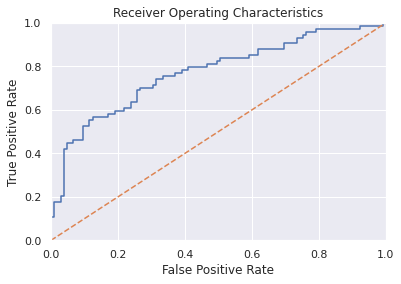

In [88]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

- Dari ROC curve, dapat di lihat bahwa model yang telah dibuat cenderung melengkung ke kiri atas, yang menandakan sudah cukup baik dalam memprediksi.